<a href="https://colab.research.google.com/github/artiboi2002/AFRL-Intern-Project-Data-Poisoning-Attacks-Using-DP-SGD/blob/main/experiment_3_clean_cnn_with_dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/AFRL-Intern-Project-Data-Poisoning-Attacks-Using-DP-SGD')


Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from opacus import PrivacyEngine
%matplotlib inline


In [ ]:
from models.cnn import ConvolutionalNeuralNetwork
from utils.trainingFunction import trainingFunction

In [ ]:
transform = transforms.ToTensor() #converting MNIST Image into tensor of 4 dimensions(image, height, wdith, color channel)
#Train Data
trainData = datasets.MNIST(root ='/cnn_data', train = True, download = True, transform = transform)
#Test Data
testData = datasets.MNIST(root = '/cnn_data', train = False, download = True, transform = transform)

torch.manual_seed(41)
model = ConvolutionalNeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) #Smaller the learning rate the longer is gonna take to train
trainLoader = DataLoader(trainData, batch_size=10, shuffle = True)
testLoader = DataLoader(testData, batch_size=10, shuffle = False)
epochs = 30

#Adding differnetial privacy before training
privacy = PrivacyEngine()
model, optimizer, trainLoader = privacy.make_private_with_epsilon(module = model, optimizer = optimizer, data_loader= trainLoader,
    target_epsilon=1.0, target_delta=1e-5, epochs=30, max_grad_norm=1.0)

train_loss, test_loss, train_correct, test_correct = trainingFunction(
    model, trainLoader, testLoader, epochs, criterion, optimizer
)

epsilon = privacy.get_epsilon(delta=1e-5)
print(f"Final ε after training: {epsilon:.2f}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 39.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.06MB/s]
/usr/local/lib/python3.11/dist-packages/opacus/privacy_engine.py:96: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/opacus/accountants/analysis/rdp.py:332: UserWarning: Optimal order is the largest alpha. Please consider expanding the range of alphas to get a tighter privacy bound.
  warnings.warn(


Epoch: 1, Batch 600, Loss  2.3225
Epoch: 1, Batch 1200, Loss  2.3037
Epoch: 1, Batch 1800, Loss  2.3092
Epoch: 1, Batch 2400, Loss  2.3132
Epoch: 1, Batch 3000, Loss  2.3185
Epoch: 1, Batch 3600, Loss  2.2909
Epoch: 1, Batch 4200, Loss  2.3059
Epoch: 1, Batch 4800, Loss  2.2628
Epoch: 1, Batch 5400, Loss  2.2932
Epoch: 1, Batch 6000, Loss  2.2957
Epoch 1 — Train Accuracy: 18.20%
Epoch 1 — Test Accuracy: 31.37%
Epoch: 2, Batch 600, Loss  2.2915
Epoch: 2, Batch 1200, Loss  2.2737
Epoch: 2, Batch 1800, Loss  2.2548
Epoch: 2, Batch 2400, Loss  2.2734
Epoch: 2, Batch 3000, Loss  2.2581
Epoch: 2, Batch 3600, Loss  2.2859
Epoch: 2, Batch 4200, Loss  2.2459
Epoch: 2, Batch 4800, Loss  2.2648
Epoch: 2, Batch 5400, Loss  2.2258
Epoch: 2, Batch 6000, Loss  2.1367
Epoch 2 — Train Accuracy: 32.63%
Epoch 2 — Test Accuracy: 46.41%
Epoch: 3, Batch 600, Loss  2.1448
Epoch: 3, Batch 1200, Loss  2.1906
Epoch: 3, Batch 1800, Loss  2.1005
Epoch: 3, Batch 2400, Loss  2.1922
Epoch: 3, Batch 3000, Loss  2.120

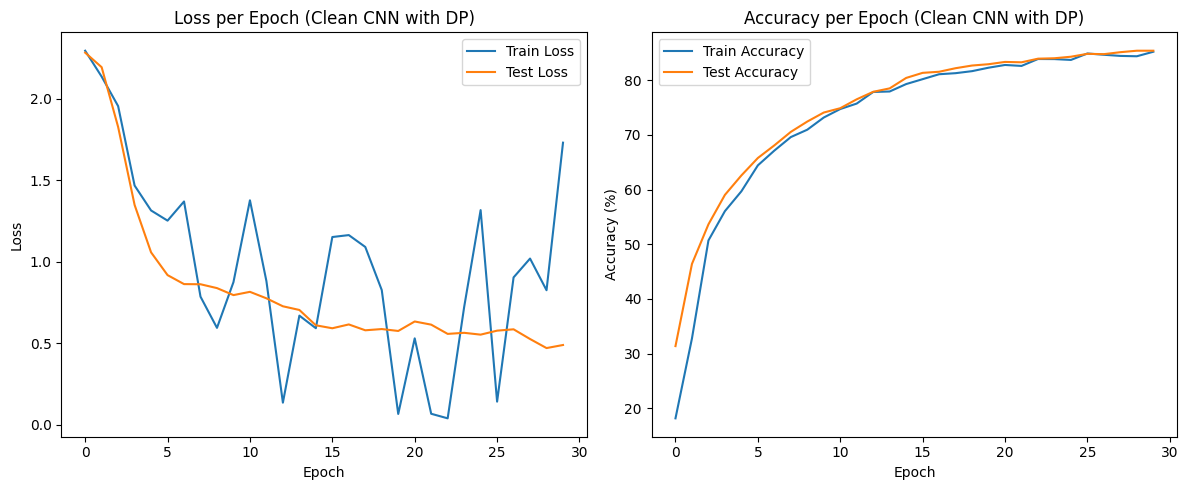

In [ ]:
def compute_accuracy(correct_list, total_samples):
    return [100 * (x / total_samples) for x in correct_list]

train_acc = compute_accuracy(train_correct, len(trainLoader.dataset))
test_acc = compute_accuracy(test_correct, len(testLoader.dataset))

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Loss per Epoch (Clean CNN with DP)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.title('Accuracy per Epoch (Clean CNN with DP)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()
